In [195]:
# Imported all modules needed

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import numpy as np
import requests
from bs4 import BeautifulSoup
from scipy import stats

In [ ]:
### Get demography data from canada.ca 

In [197]:
# Load the dataset
url = 'https://www.canada.ca/en/treasury-board-secretariat/services/innovation/human-resources-statistics/diversity-inclusion-statistics/distribution-public-service-canada-employees-designated-sub-group-occupational-group-members-visible-minorities.html'

# Get the webpage content for web scraping 
response = requests.get(url)
response.raise_for_status()  # Raise an exception for HTTP errors

# Parse the HTML content using BeautifulSoup (web scraping)
soup = BeautifulSoup(response.content, 'html.parser')
tables = soup.find_all('table')

In [ ]:
### Get

In [199]:
# Get information for 2023

table = tables[0]
rows = table.find_all('tr')

# Initialize variables
chinese_percentage_2023 = None
other_percentage_2023 = None

for row in rows:
    # Find the occupational group header
    header = row.find('th', {'scope': 'row'})
    if header and 'FI: Financial Management' in header.get_text(strip=True):
        # Get all data cells in this row
        cells = row.find_all('td')
        other_percentage_2023 = cells[24].get_text(strip=True)  # Black Number is 2nd cell
        black_percentage_2023 = cells[2].get_text(strip=True)  # Black Number is 2nd cell
        break

print(f"Blacks in Financial Management: {black_number_2023}")
print(f"Others in Financial Management: {other_percentage_2023}")

Blacks in Financial Management: 479
Others in Financial Management: 35.4


In [201]:
# Get information for 2022

table = tables[1]
rows = table.find_all('tr')
# Initialize variables
other_percentage_2022 = None
black_percentage_2022 = None

for row in rows:
    # Find the occupational group header
    header = row.find('th', {'scope': 'row'})
    if header and 'FI: Financial Management' in header.get_text(strip=True):
        # Get all data cells in this row
        cells = row.find_all('td')
        other_percentage_2022 = cells[24].get_text(strip=True)  # Black Number is 2nd cell
        black_percentage_2022 = cells[2].get_text(strip=True)  # Black Number is 2nd cell
        break

print(f"Blacks in Financial Management: {black_percentage_2022}")
print(f"Others in Financial Management: {other_percentage_2022}")

Blacks in Financial Management: 7.2
Others in Financial Management: 34.4


In [223]:
### We have our data... Now we train our Linear Regression model to predict the future!

In [203]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Define historical percentage data
data = {
    'year': [2022, 2023],
    'black_percentage': [black_percentage_2022, black_percentage_2023],
    'other_percentage': [other_percentage_2022, other_percentage_2023]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Convert percentages to float (removing any % signs if present)
df['black_percentage'] = df['black_percentage'].astype(str).str.replace('%', '').astype(float)
df['other_percentage'] = df['other_percentage'].astype(str).str.replace('%', '').astype(float)

# Save historical data to CSV
df.to_csv('financial_management_percentages.csv', index=False)

# Prepare data for Linear Regression
X = df[['year']]
y_black = df['black_percentage']
y_other = df['other_percentage']

# Create and fit separate models
model_black = LinearRegression()
model_other = LinearRegression()
model_black.fit(X, y_black)
model_other.fit(X, y_other)

# Generate future predictions (next 5 years)
future_years = pd.DataFrame({'year': range(2024, 2029)})
predicted_black_percentage = model_black.predict(future_years)
predicted_other_percentage = model_other.predict(future_years)

# Create DataFrame with predictions
predictions = pd.DataFrame({
    'year': future_years['year'],
    'predicted_black_percentage': predicted_black_percentage,
    'predicted_other_percentage': predicted_other_percentage
})

# Save predictions to CSV
predictions.to_csv('predicted_financial_management_percentages.csv', index=False)

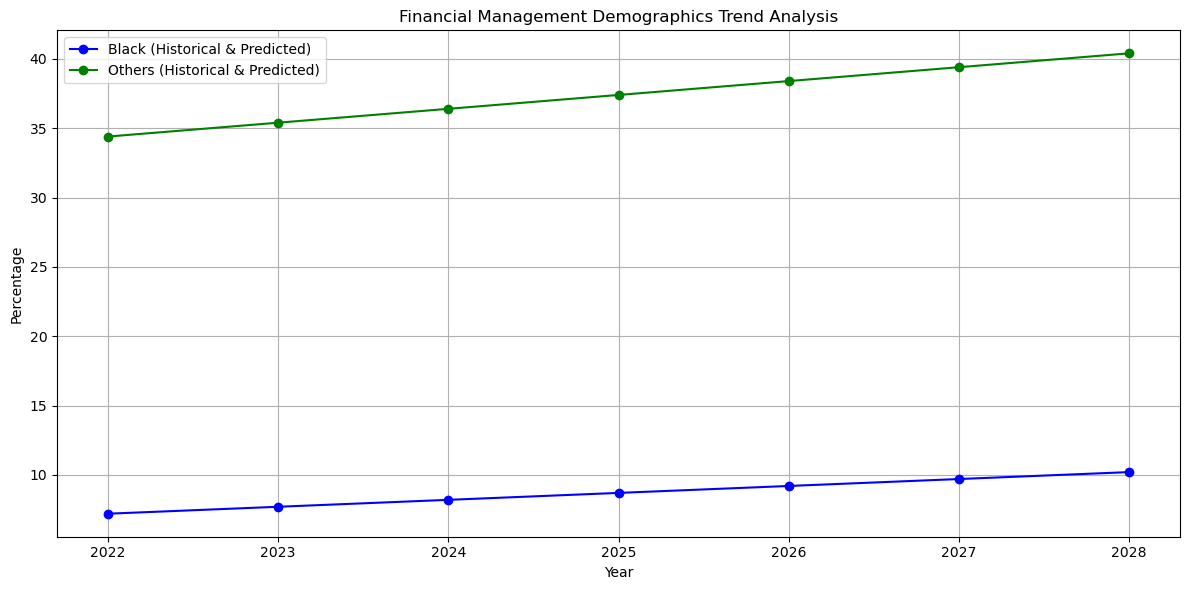

In [205]:
# Visualize the trends
plt.figure(figsize=(12, 6))

# Combine historical and predicted data for continuous lines
all_years = pd.concat([df['year'], future_years['year']])
all_black_percentage = pd.concat([df['black_percentage'], pd.Series(predicted_black_percentage)])
all_other_percentage = pd.concat([df['other_percentage'], pd.Series(predicted_other_percentage)])

# Plot percentage trends
plt.plot(all_years, all_black_percentage, 'b-o', label='Black (Historical & Predicted)')
plt.plot(all_years, all_other_percentage, 'g-o', label='Others (Historical & Predicted)')

plt.title('Financial Management Demographics Trend Analysis')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [207]:
### Find slope (rate of change) to better compare

In [221]:
others_y = np.array([float(other_percentage_2022), float(other_percentage_2023)] + list(predicted_other_percentage))
others_x = np.array([2022,2023,2024,2025,2026,2027,2028])

blacks_y = np.array([float(black_percentage_2022), float(black_percentage_2023)] + list(predicted_black_percentage))
blacks_x = np.array([2022,2023,2024,2025,2026,2027,2028])

others_stats = stats.linregress(others_x,others_y)
blacks_stats = stats.linregress(blacks_x, blacks_y)

print(f'Black Data Slope: {blacks_stats.slope}')
print(f'Others Data Slope: {others_stats.slope}')

Black Data Slope: 0.500000000000008
Others Data Slope: 1.0000000000000164
